In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import cv2
import sys
sys.path.append("..")
from utils.utils import trans_cutout

## Get cutout examples

In [45]:
cutout_dir = "../data/semifield-cutouts/"
df = pd.read_csv("../data/semifield-cutouts/TX_2023-01-13/TX_2023-01-13.csv")
df["state_id"] = df.batch_id.str.split("_", expand=False).str[0]
df["date"] = df.batch_id.str.split("_", expand=False).str[1]
df["common_name"] = np.where(df.common_name == "Common lambsquarters", "Lambsquarter", df.common_name)
df["temp_path"] = cutout_dir + df["cutout_path"]
df = df[df["common_name"]!= "colorchecker"]

In [46]:
df.common_name.unique()
df.columns

Index(['blob_home', 'data_root', 'season', 'batch_id', 'image_id',
       'cutout_num', 'datetime', 'cutout_id', 'cutout_path', 'is_primary',
       ...
       'num_components', 'hex_10', 'rgb_10', 'occurences_10', 'hex_11',
       'rgb_11', 'occurences_11', 'state_id', 'date', 'temp_path'],
      dtype='object', length=125)

In [47]:
df["common_name"].unique()

array(['Oats', 'Mustards', 'Black oats', 'cultivated radish'],
      dtype=object)

Oats


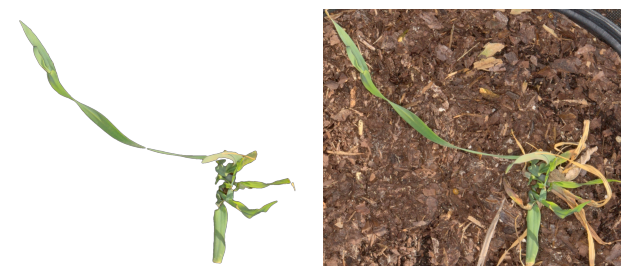

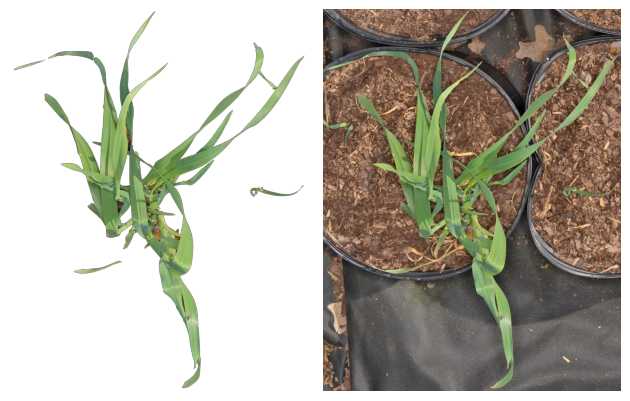

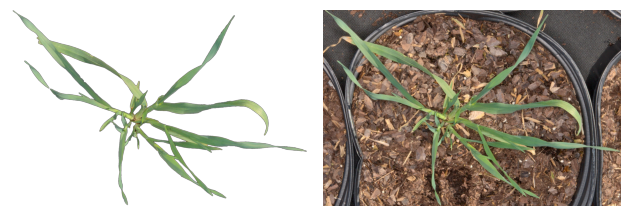

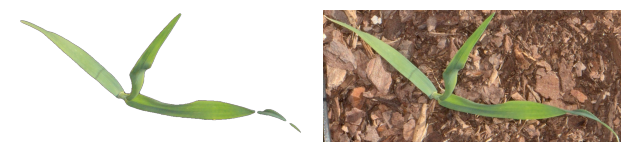

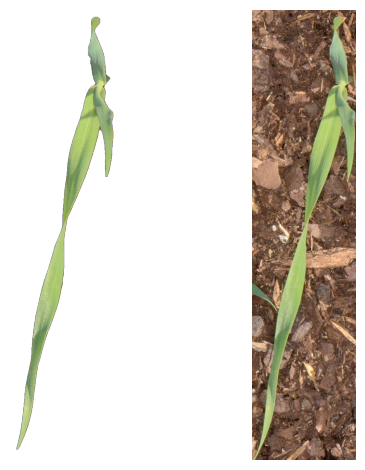

Mustards


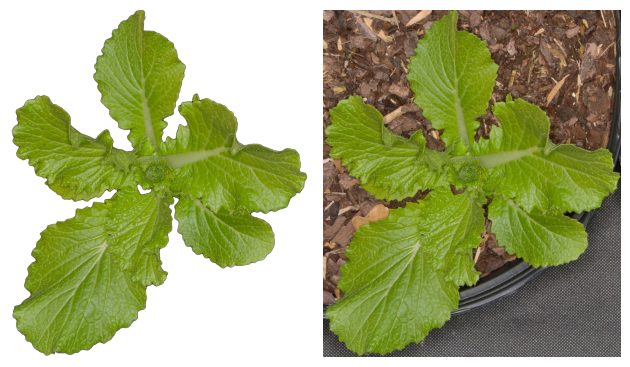

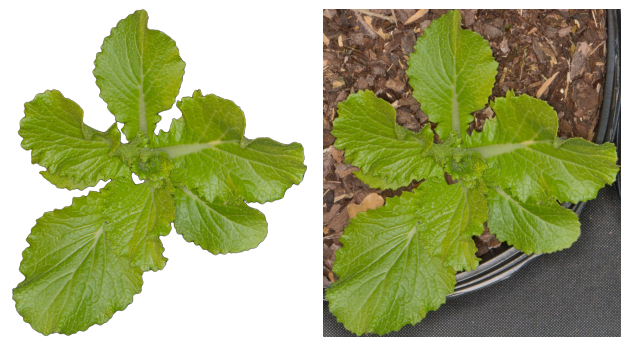

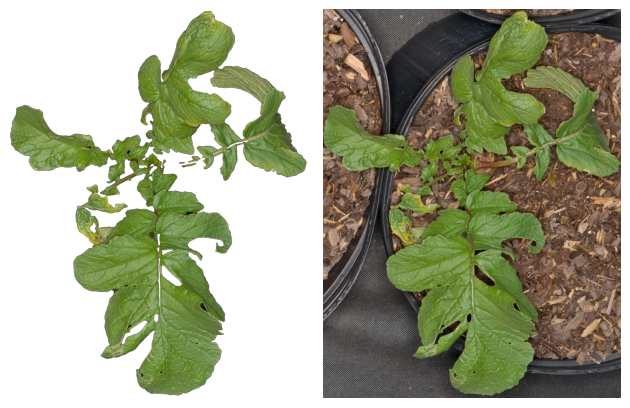

Black oats


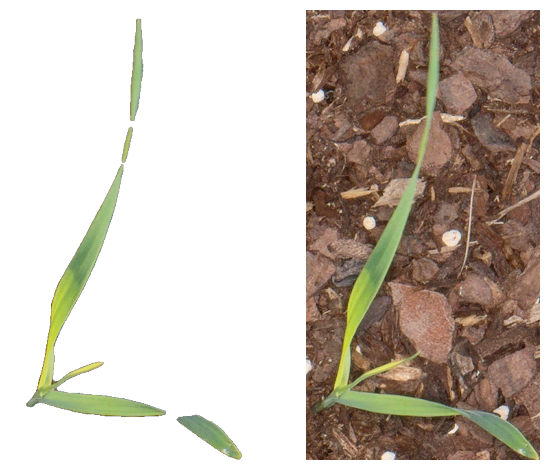

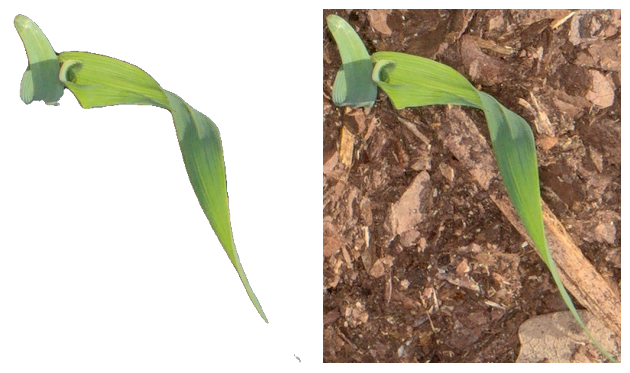

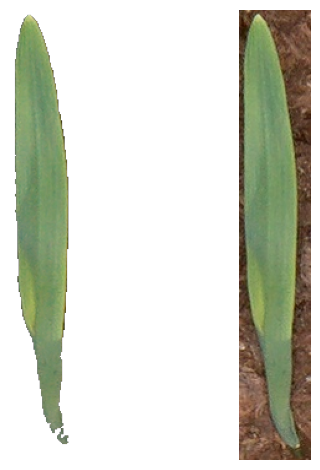

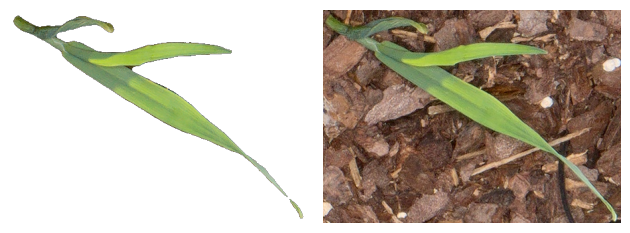

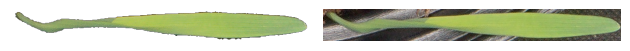

cultivated radish


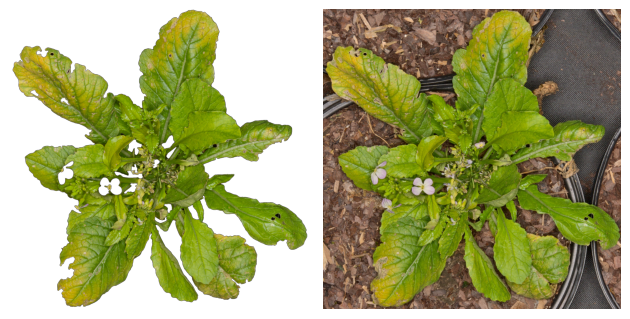

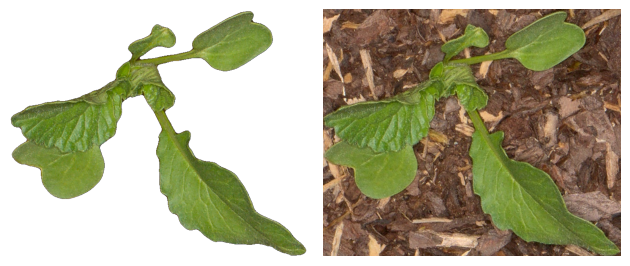

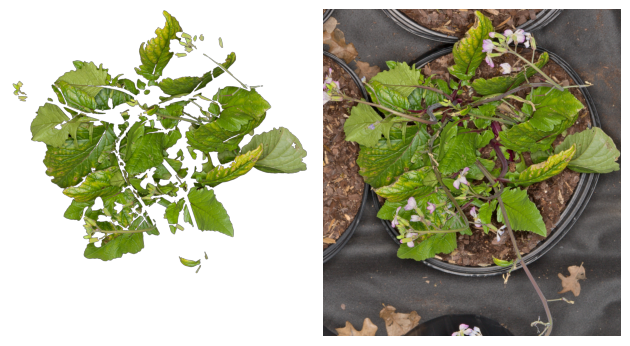

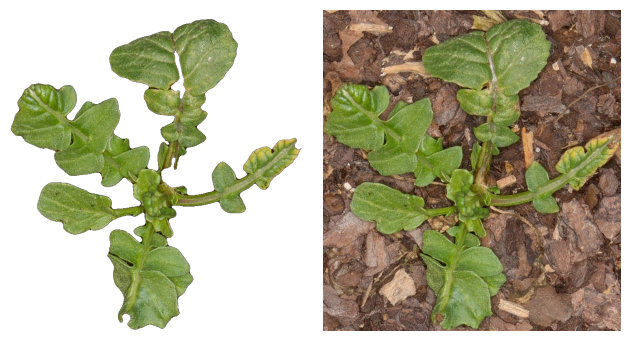

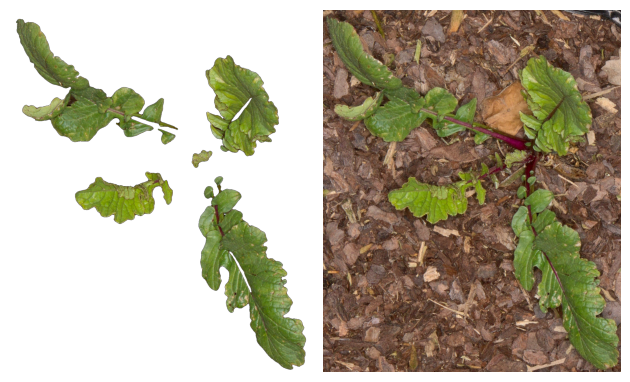

In [52]:
number_of_samples = 5
# custom_species = ["Cocklebur"]
for species in df["common_name"].unique():
# for species in custom_species:
    print(species)
    if species != "Black oats":
        mdf = df[df["common_name"] == species]
        mdf = mdf[mdf["extends_border"] == False]
        mdf = mdf[mdf["is_primary"] == True]
        mdf = mdf[mdf["green_sum"] > 20000]
        # mdf = mdf[mdf["area"] < 100]
    else:
        mdf = df[df["common_name"] == species]
        mdf = mdf[mdf["extends_border"] == False]
        mdf = mdf[mdf["is_primary"] == True]
        mdf = mdf[mdf["green_sum"] > 7000]
        # mdf = mdf[mdf["area"] < 100]

    if len(mdf) == 0:
        print(f"{species} None")
        continue
    if len(mdf) < number_of_samples:
        imgpsdf = mdf.sample(len(mdf), random_state=42)
    else:
        imgpsdf = mdf.sample(number_of_samples, random_state=42)
    
    for idx, row in imgpsdf.iterrows():
        
        cutimgp = row["temp_path"]
        cropimgp = row["temp_path"].replace(".png", ".jpg")
        save_cutout_path = Path(f"../assets/confluence_examples_covers/{row['common_name']}/{Path(row['cutout_id'])}.png")
        Path(save_cutout_path.parent).mkdir(exist_ok=True, parents=True)
        cropimg = cv2.cvtColor(cv2.imread(cropimgp,-1), cv2.COLOR_BGR2RGB)
        cutimg = cv2.cvtColor(cv2.imread(cutimgp,-1), cv2.COLOR_BGR2RGB)
        cutimg = trans_cutout(cutimg)

        fig, (ax1, ax2) = plt.subplots(1,2)
        ax1.imshow(cutimg)
        ax2.imshow(cropimg)
        ax1.axis(False)
        ax2.axis(False)
        
        plt.tight_layout()
        # plt.savefig(save_cutout_path, bbox_inches="tight", transparent=True, dpi=300)
        plt.show()
        plt.close()
        

## Whole image examples

In [7]:
# for idx, i in df.iterrows():
#     print(i["r"])

In [23]:
df["image_temp_path"] = "/mnt/research-projects/s/screberg/longterm_images/semifield-developed-images/" + df["batch_id"] + "/images/" + df["image_id"] + ".jpg"
df["mask_temp_path"] = "/mnt/research-projects/s/screberg/longterm_images/semifield-developed-images/" + df["batch_id"] + "/meta_masks/semantic_masks/" + df["image_id"] + ".png"

for species in df["common_name"].unique()[10:]:
    print(species)
    mdf = df[df["common_name"] == species]
    # mdf = mdf[mdf["extends_border"] == False]
    # mdf = mdf[mdf["is_primary"] == True]
    mdf = mdf[mdf["green_sum"] > 500000]
    if len(mdf) == 0:
        print(f"{species} None")
        continue
    if len(mdf) < 3:
        imgpsdf = mdf.sample(len(mdf), random_state=42)
    else:
        imgpsdf = mdf.sample(3, random_state=42)
    for idx, i in imgpsdf.iterrows():
        
        imgp = i["image_temp_path"]
        if not Path(imgp).is_file():
            continue
        
        maskp = i["mask_temp_path"]
        save_path = Path(f"../assets/confluence_examples/images/{i['common_name']}/{Path(i['image_id'])}.png")
        Path(save_path.parent).mkdir(exist_ok=True, parents=True)
        img = cv2.cvtColor(cv2.imread(imgp,-1), cv2.COLOR_BGR2RGB)
        masks = cv2.imread(maskp,-1)
        zero_masks = np.zeros((masks.shape[0], masks.shape[1], 3))
        rgb = [i["r"], i["g"], i["b"]]
        
        zero_masks[np.where(masks != 0)] = rgb
        zero_masks = zero_masks.astype(np.int64)
        
        fig, (ax1, ax2) = plt.subplots(1,2)
        ax1.imshow(img)
        # plt.imshow(zero_masks)
        ax2.imshow(zero_masks)
        ax1.axis(False)
        ax2.axis(False)

        plt.tight_layout()
        plt.savefig(save_path, bbox_inches="tight", transparent=True, dpi=300)
        plt.close()
        # plt.show()
        

Palmer amaranth
Large crabgrass
Soybean
Cocklebur
Texas millet
Purple nutsedge
Sicklepod
Common ragweed
Goosegrass
